Prerequisites
--------
------------


Registration number: 191910

Alpha = 1 + mod(910,3)

Alpha = 2

***Note : This time alpha = 1 + mod(910,3) = 2 and not the usual alpha = 1+mod(910,4) = 3***

In [28]:
# Import Statements
import numpy as np
import pandas as pd
import scipy as sc
import math
from matplotlib import pyplot as plt
from scipy.io import wavfile
from scipy import signal as sg
from IPython.display import Audio, display, Latex

In [2]:
# Alpha  = 1 + mod(910,4)
alpha = 1 + (910%3)
alpha

2

In [3]:
# This is because I'm using Google Colab Noteboook 
# So please don't run this without mounting the drive
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/DSP\ LAB/Experiment\ 4

Mounted at /content/drive
/content/drive/My Drive/DSP LAB/Experiment 4


Problem  #1
-----
-----

Question 1 & 2
---------------

In [84]:
fs = 120
t = np.arange(0, 2, 1/fs)
signal = np.sin(2*np.pi*15*alpha*t)
# DFT for the first 120 samples using `fft`
signal_1_dft = np.abs(np.fft.fft(signal[0:120]))
signal_1_freq = np.linspace(0, fs/2, len(signal_1_dft))

# DFT for the first 130 samples using `fft`
signal_2_dft = np.abs(np.fft.fft(signal[0:130]))
signal_2_freq = np.linspace(0, fs/2, len(signal_2_dft))

Text(135.125, 0.5, '$|X(\\Omega)|$')

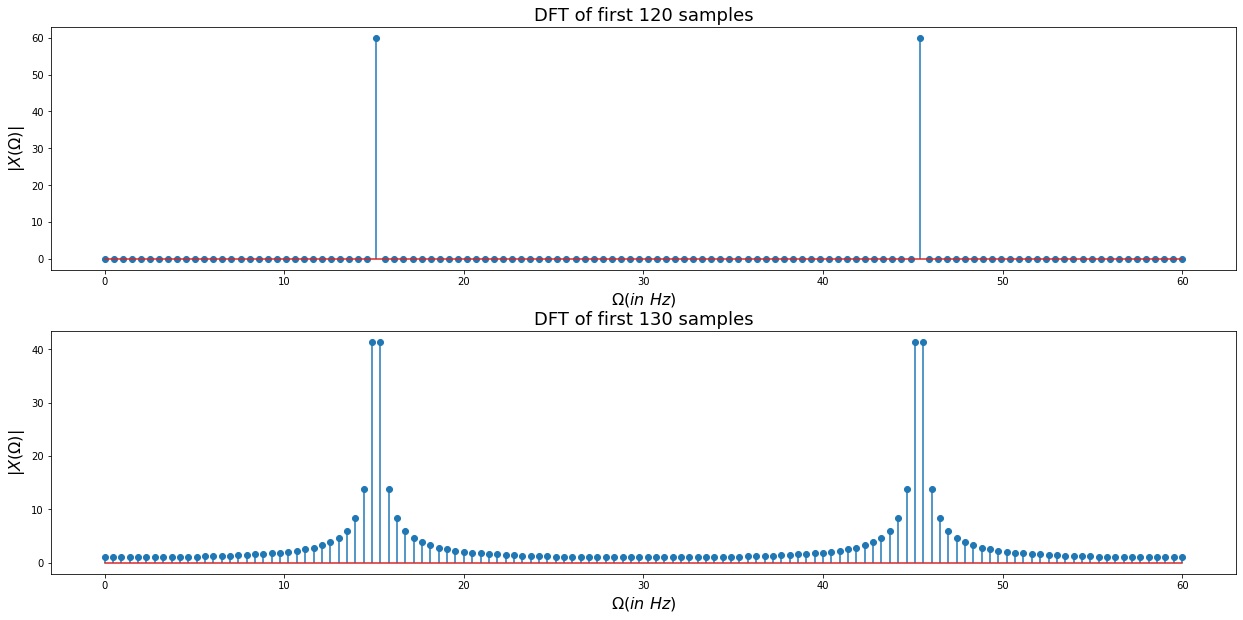

In [85]:
fig, axes = plt.subplots(2, figsize=(18, 9))
fig.tight_layout(pad=4)
# Stem plot the computed DFTs
axes[0].stem(signal_1_freq, signal_1_dft, use_line_collection=True)
axes[0].set_title('DFT of first 120 samples', fontsize=18)
axes[0].set_xlabel('$\Omega(in\ Hz)$', fontsize=16)
axes[0].set_ylabel(r'$|X(\Omega)|$', fontsize=16)
axes[1].stem(signal_2_freq, signal_2_dft, use_line_collection=True)
axes[1].set_title('DFT of first 130 samples', fontsize=18)
axes[1].set_xlabel('$\Omega(in\ Hz)$', fontsize=16)
axes[1].set_ylabel(r'$|X(\Omega)|$', fontsize=16)

Text(0, 0.5, '$|X(\\Omega)|$')

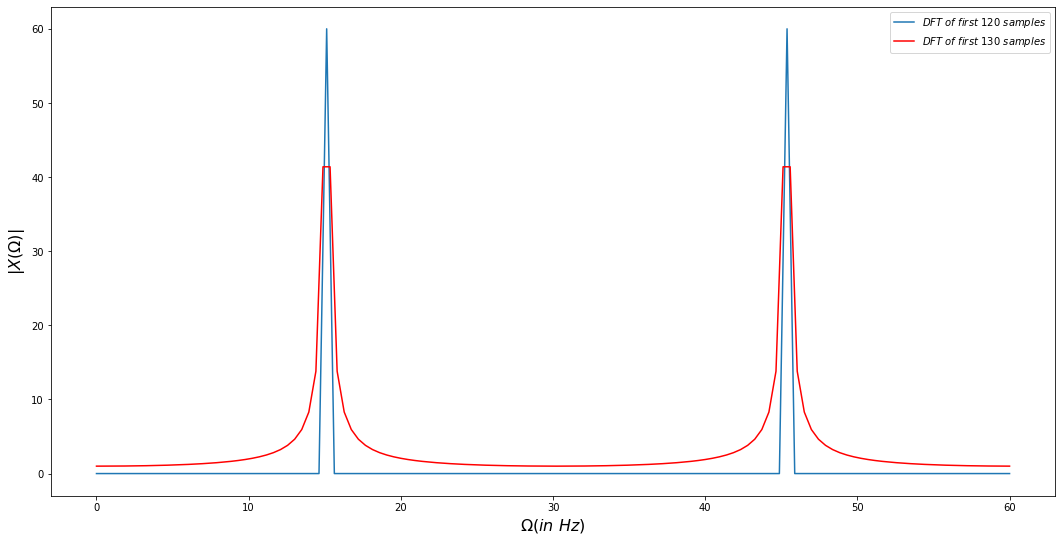

In [53]:
plt.figure(figsize=(18, 9))
plt.tight_layout(pad=4)
plt.plot(signal_1_freq, signal_1_dft)
plt.plot(signal_2_freq, signal_2_dft,'r')
plt.legend([r'$DFT\ of\ first\ 120\ samples$', r'$DFT\ of\ first\ 130\ samples$'])
plt.xlabel('$\Omega(in\ Hz)$', fontsize=16)
plt.ylabel(r'$|X(\Omega)|$', fontsize=16)

Question 3
---------------

Text(81.125, 0.5, '$|X(\\Omega)|$')

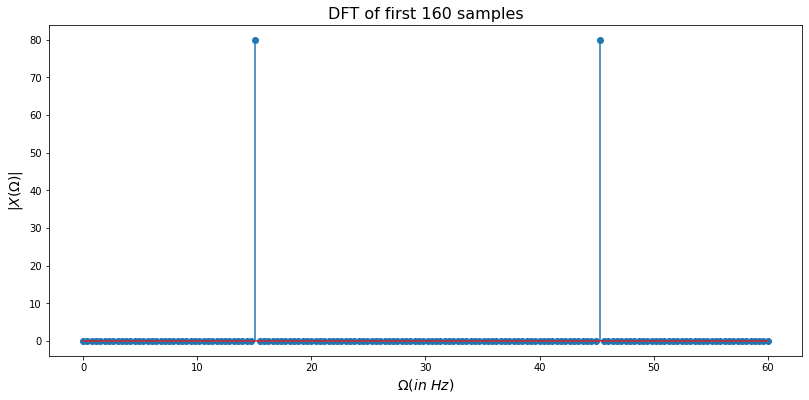

In [5]:
dft_2 = np.abs(np.fft.fft(signal[0:160]))
freq_2 = np.linspace(0, fs/2, len(dft_2))
fig, axes = plt.subplots(1, figsize=(12, 6))
fig.tight_layout(pad=4)
axes.stem(freq_2, dft_2, use_line_collection=True)
axes.set_title('DFT of first 160 samples', fontsize=16)
axes.set_xlabel('$\Omega(in\ Hz)$', fontsize=14)
axes.set_ylabel(r'$|X(\Omega)|$', fontsize=14)

-------------------------------------------

Problem  #2
-----
-----

In [54]:
fs = 200
t = np.arange(0, 10, 1/fs)
A,B = 140,146
signal = 0.1*(np.sin(A*np.pi*t) + np.cos(B*np.pi*t))

In [55]:
def plot_dft(fs, signal, samples):
  t_dft = np.abs(np.fft.fft(signal[0:samples]))
  # Plotting up till sampling frequency, but the values possible according to
  # sampling theorem is half the sampling frequency
  t_freq = np.arange(len(t_dft))/(len(t_dft)/fs)
  # t_freq = np.linspace(0, p_f_s/2, len(t_dft))
  plt.figure(figsize=(18,9))
  plt.plot(t_freq, t_dft)
  plt.title(r'$DFT\ of\ first\ %d\ samples$' %(samples), fontsize=18)
  plt.xlabel('$\Omega(in\ Hz)$', fontsize=16)
  plt.ylabel(r'$|X_a(\Omega)|$', fontsize=16)
  plt.xlim(0, fs/2)

Question (i)
-----------------

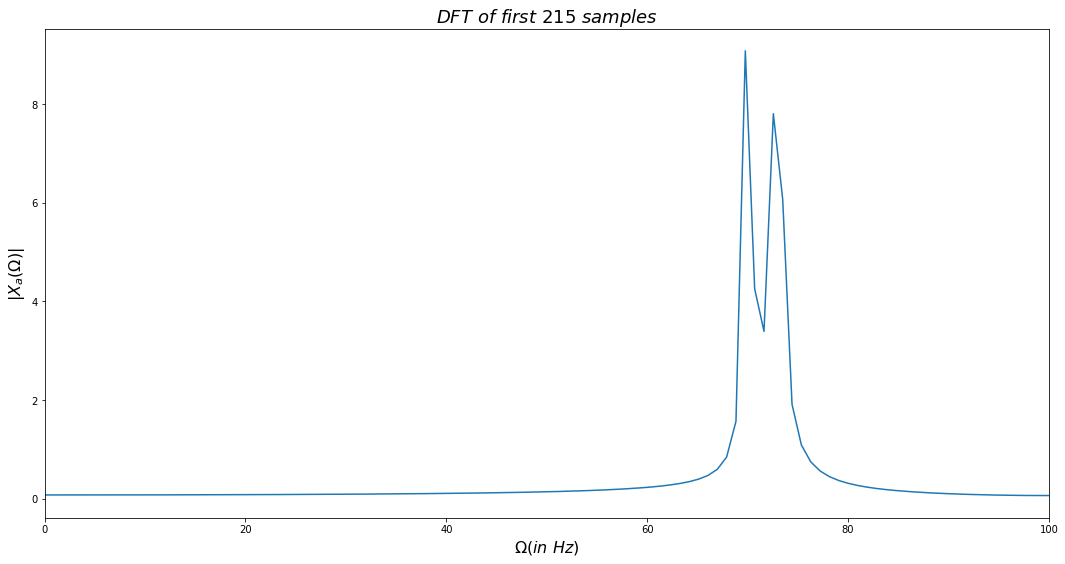

In [56]:
plot_dft(fs, signal, 215)

Question (ii)
---------------

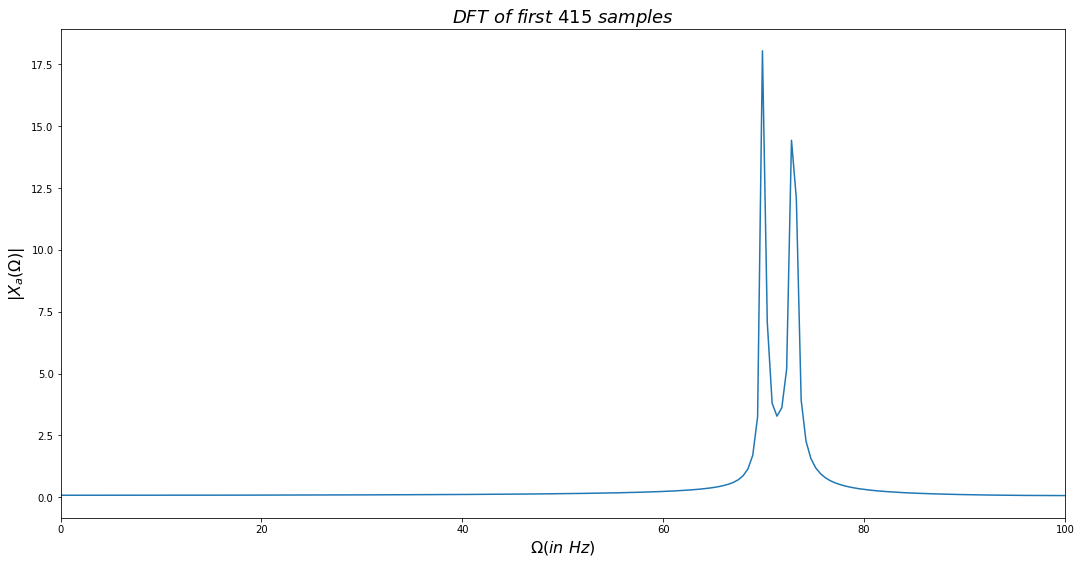

In [57]:
plot_dft(fs, signal, 415)

Question (iii)
---------------

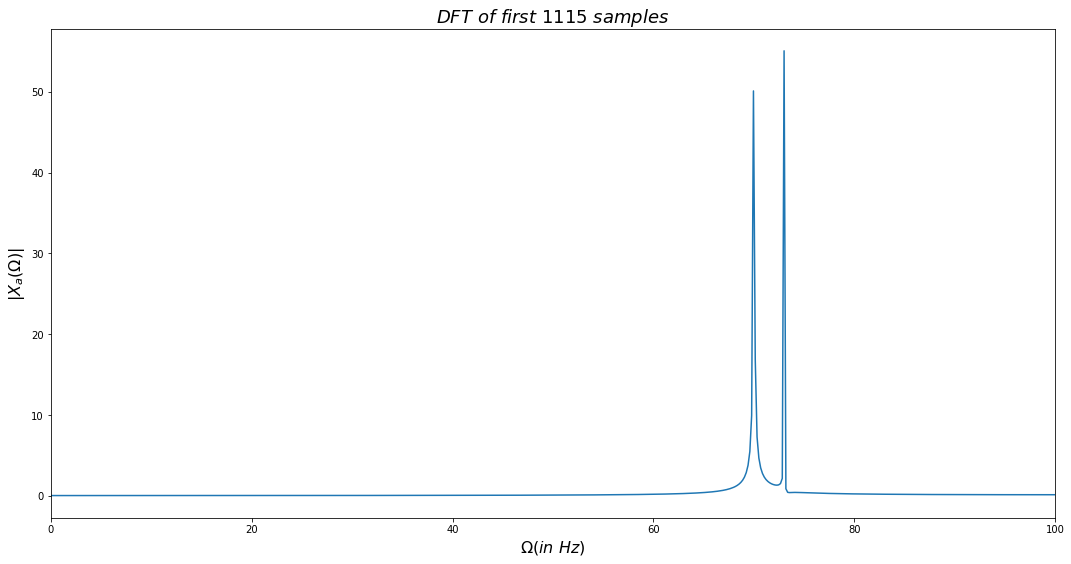

In [58]:
plot_dft(fs, signal, 1115)

Question (iv)
---------------

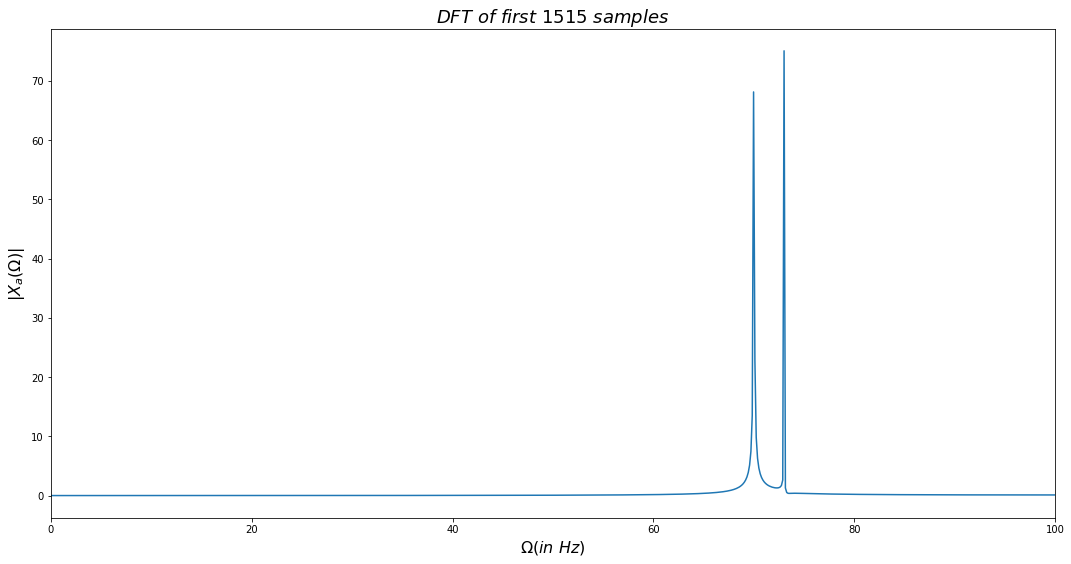

In [59]:
plot_dft(fs, signal, 1515)

Question (v)
---------------

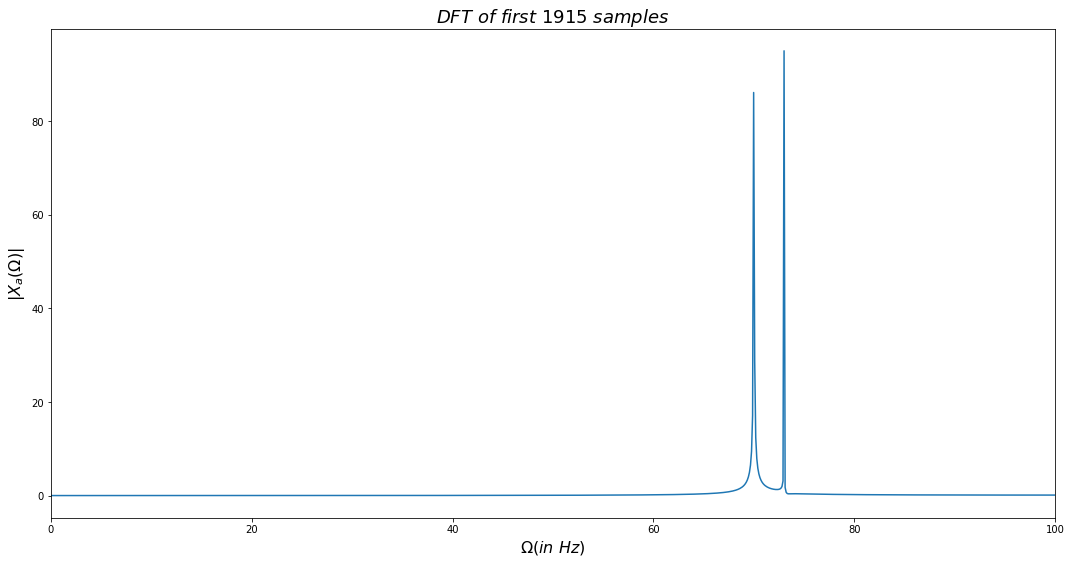

In [60]:
plot_dft(fs, signal, 1915)

------------------------------------------------------------

Problem  #3
-----
-----

In [61]:
fs = 200
t = np.arange(0, 10, 1/fs)
A,B = 140,146
signal = 0.1*(np.sin(A*np.pi*t) + np.cos(B*np.pi*t))

In [69]:
def plot_dft_hanning(fs, signal, samples):
  t_dft = np.abs(np.fft.fft(signal[0:samples]*np.hanning(samples)))
  t_freq = np.arange(len(t_dft))/(len(t_dft)/fs)
  plt.figure(figsize=(18,9))
  plt.plot(t_freq, t_dft)
  plt.title(r'DFT of first %d samples using Hanning' %(samples), fontsize=18)
  plt.xlabel(r'$\Omega(in\ Hz)$', fontsize=16)
  plt.ylabel(r'$|X_a(\Omega)|$', fontsize=16)
  plt.xlim(0, 100)

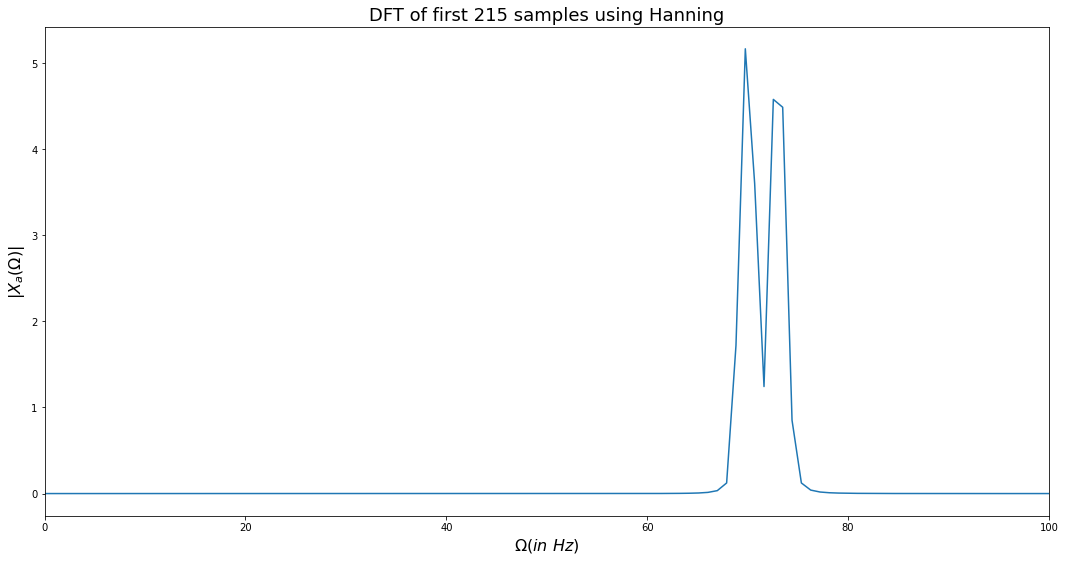

In [70]:
plot_dft_hanning(fs, signal, 215)

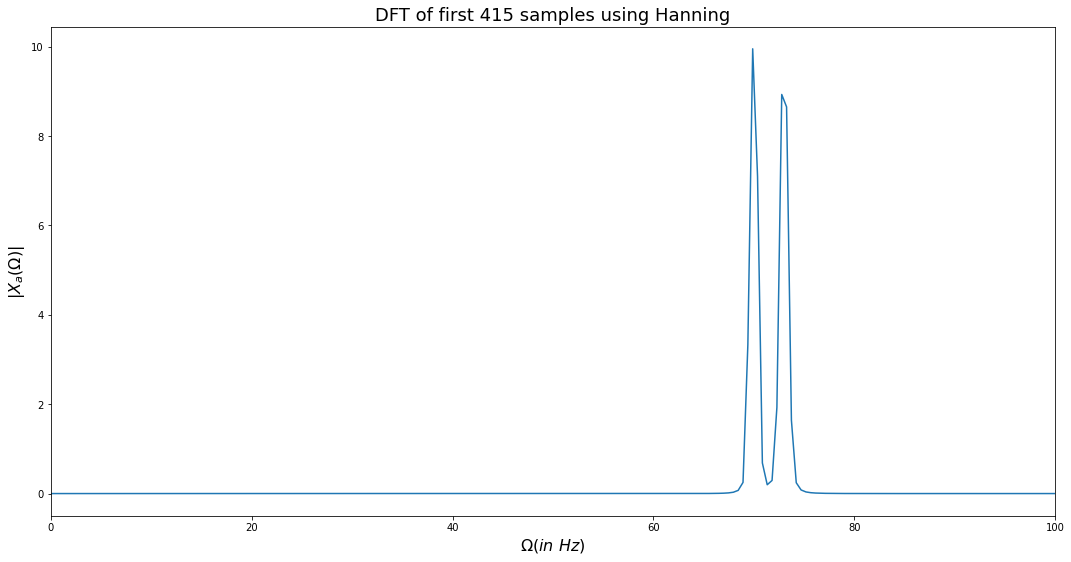

In [71]:
plot_dft_hanning(fs, signal, 415)

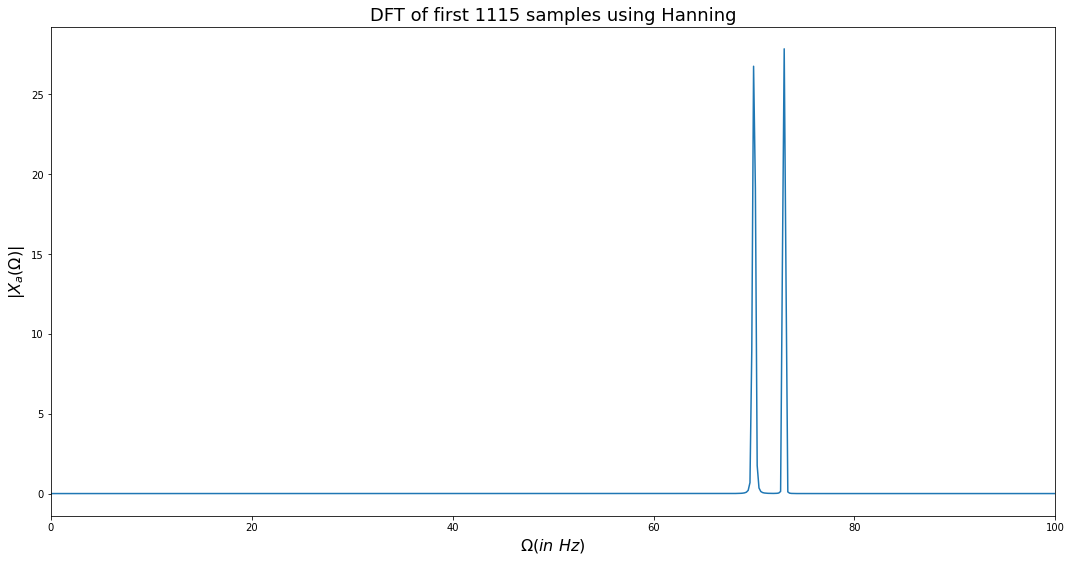

In [72]:
plot_dft_hanning(fs, signal, 1115)

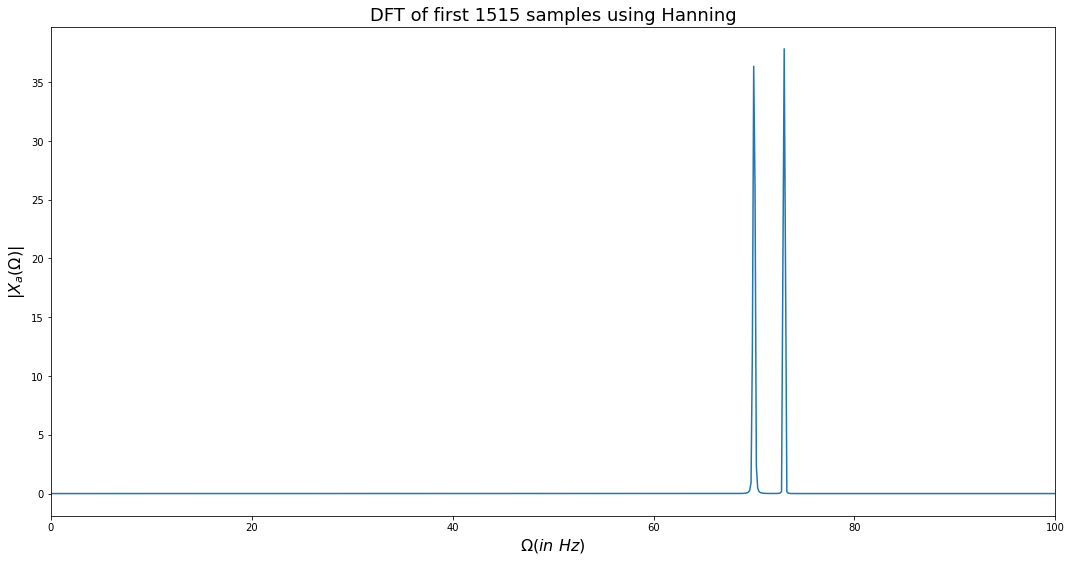

In [73]:
plot_dft_hanning(fs, signal, 1515)

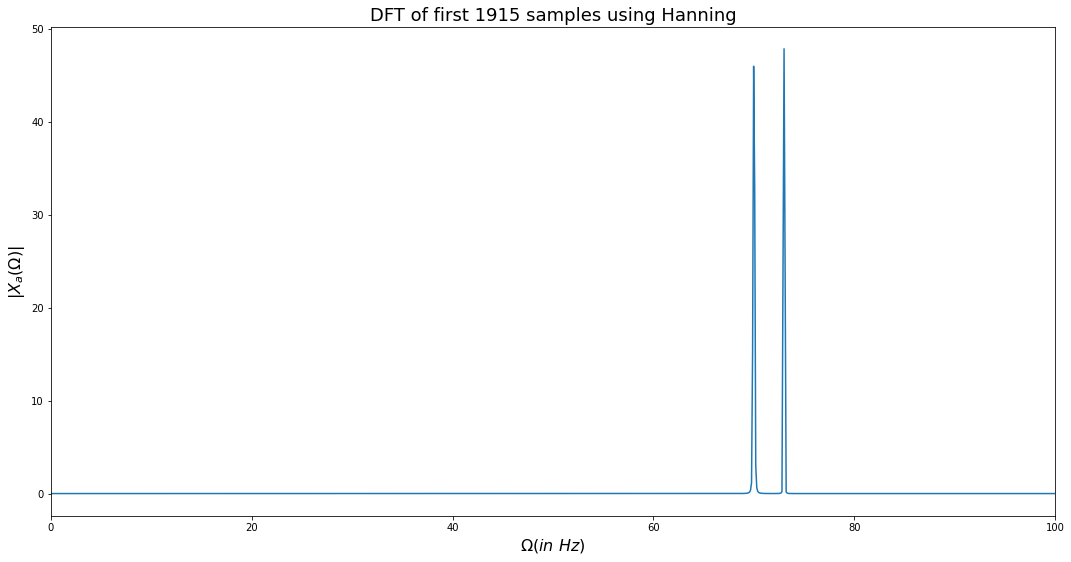

In [74]:
plot_dft_hanning(fs, signal, 1915)

---

Problem  #4
-----
-----

Question 1
-----------

Hamming Windowing

Text(0.5, 1.0, 'DFT after applying Hamming Window')

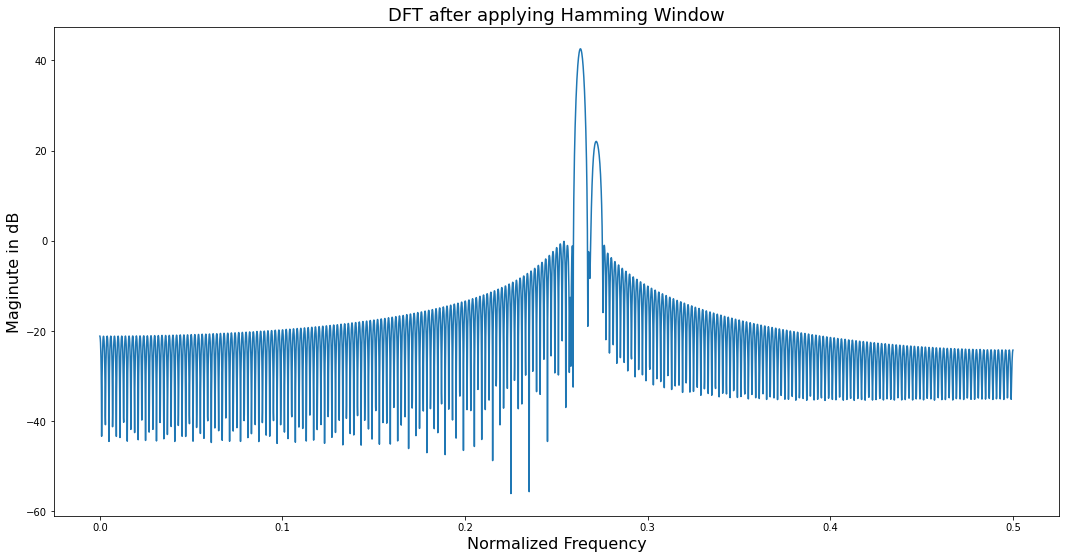

In [80]:
signal = np.loadtxt('Exp4Data2.txt' , delimiter=',')
dft = np.fft.rfft(signal * np.hamming(len(signal)), n=8192)
freq = np.fft.rfftfreq(8192)
plt.figure(figsize=(18,9))
plt.plot(freq, 20*np.log10(np.abs(dft)))
plt.ylabel('Maginute in dB', fontsize=16)
plt.xlabel('Normalized Frequency', fontsize=16)
plt.title('DFT after applying Hamming Window', fontsize=18)


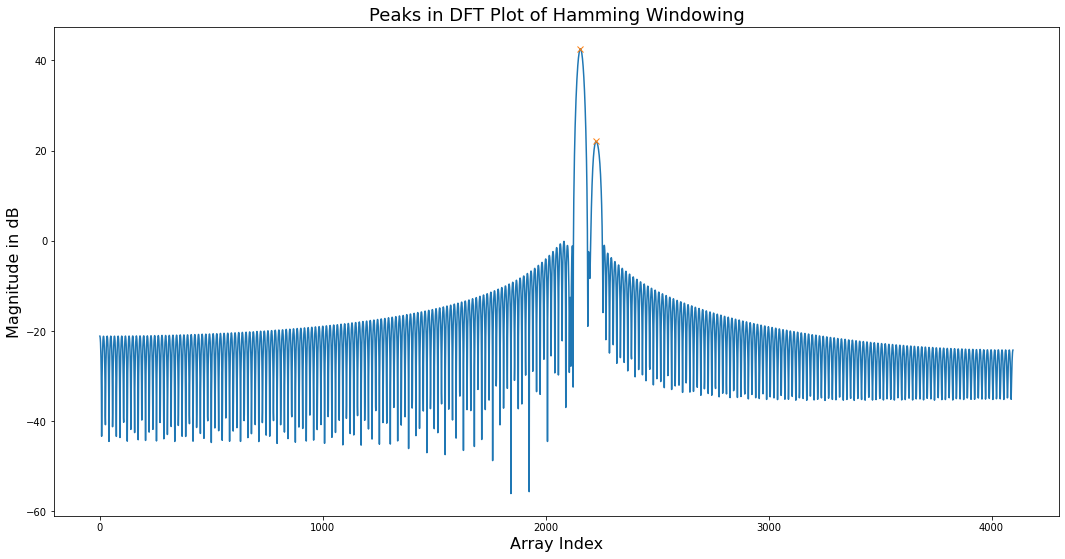

<IPython.core.display.Latex object>

In [81]:
peaks_1, a = sg.find_peaks(20*np.log10(np.abs(dft)), height=0)
plt.figure(figsize=(18,9))
plt.plot(20*np.log10(np.abs(dft)))
plt.plot(peaks_1, 20*np.log10(np.abs(dft))[peaks_1], "x")
plt.title('Peaks in DFT Plot of Hamming Windowing', fontsize=18)
plt.ylabel('Magnitude in dB', fontsize=16)
plt.xlabel('Array Index', fontsize=16)
plt.show()
Latex(data=r'$F_1 = {:.3f}F_s\\ F_2 = {:.3f}F_s$'.format(freq[peaks_1[0]], freq[peaks_1[1]]))

Question 2
----------

Rectangular Windowing

Text(0.5, 1.0, 'DFT after applying  Rectangular Window')

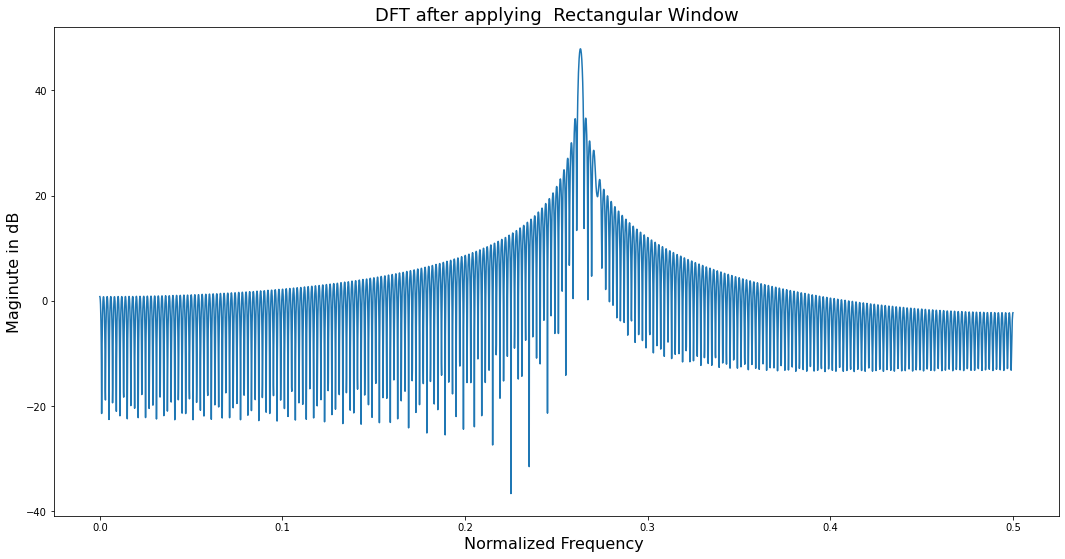

In [82]:
dft_1 = np.fft.rfft(signal * sg.boxcar(len(signal)), n=8192)
freq_1 = np.fft.rfftfreq(8192)
plt.figure(figsize=(18,9))
plt.plot(freq_1, 20*np.log10(np.abs(dft_1)))
plt.ylabel('Maginute in dB', fontsize=16)
plt.xlabel('Normalized Frequency ', fontsize=16)
plt.title('DFT after applying  Rectangular Window', fontsize=18)

[2115 2156 2197]


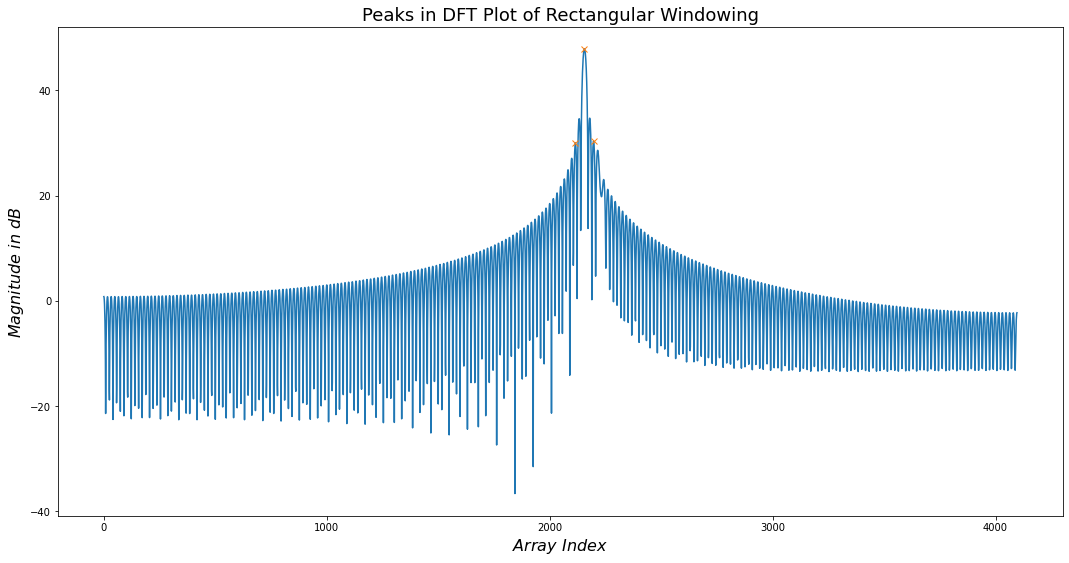

<IPython.core.display.Latex object>

In [83]:
peaks, a = sg.find_peaks(20*np.log10(np.abs(dft_1)), height=30,
                               threshold=[0, 100], distance=10, prominence=25)
print(peaks)
plt.figure(figsize=(18,9))
plt.plot(20*np.log10(np.abs(dft_1)))
plt.plot(peaks, 20*np.log10(np.abs(dft_1))[peaks], "x")
plt.title('Peaks in DFT Plot of Rectangular Windowing', fontsize=18)
plt.ylabel(r'$Magnitude\ in\ dB$', fontsize=16)
plt.xlabel(r'$Array\ Index$', fontsize=16)
plt.show()
Latex(data=r'$F_1 = {:.3f}F_s\\ F_2 = {:.3f}F_s$'.
      format(freq_1[peaks[1]], freq_1[peaks[2]]))